# PROBLEM STATEMENT

The rapid development and deployment of autonomous vehicles (AVs) present significant safety challenges, particularly regarding the reliability and robustness of their machine learning (ML) models. Despite their advanced capabilities, these ML models can fail in unexpected ways, leading to accidents and safety concerns. Current testing methodologies are often insufficient to capture the full range of real-world scenarios that AVs might encounter, particularly rare or complex crash situations. Therefore, there is a critical need to develop a comprehensive framework for crash analysis and safety testing that can identify and mitigate these vulnerabilities. This project aims to address the gap in ensuring the safety of AVs by focusing on systematic crash scenario analysis and robust safety testing of their ML models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("D:/Alma_Better_Projects/Mid_Course_ML/Crash_Data_Report.csv")
data

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.952210,33.421910,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.421910,-111.952210
1,-111.937690,33.423190,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.423190,-111.937690
2,-111.891960,33.418420,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,-111.947910,33.417790,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.417790,-111.947910
4,-111.928470,33.349560,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51402,-111.926385,33.435558,51403,4155884,2024/03/14 13:15:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.000,Not Junction Related,...,Driver,22.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.435558,-111.926385
51403,-111.926404,33.435576,51404,4155885,2024/03/14 13:20:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.000,Entrance Exit Ramp 205,...,Driver,25.0,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.435576,-111.926404
51404,-111.909869,33.436621,51405,4155890,2024/03/15 07:11:00+00,2024,SR-202 Exit 8 J-Ramp,NaN,0.000,Entrance Exit Ramp 205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.436621,-111.909869
51405,-111.939524,33.386046,51406,4155893,2024/03/09 07:44:00+00,2024,US-60 Exit 173 J-Ramp,NaN,0.000,Entrance Exit Ramp 205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.386046,-111.939524


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51407 entries, 0 to 51406
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51081 non-null  float64
 1   Y                    51081 non-null  float64
 2   OBJECTID             51407 non-null  int64  
 3   Incidentid           51407 non-null  int64  
 4   DateTime             51407 non-null  object 
 5   Year                 51407 non-null  int64  
 6   StreetName           51201 non-null  object 
 7   CrossStreet          50744 non-null  object 
 8   Distance             51406 non-null  float64
 9   JunctionRelation     51406 non-null  object 
 10  Totalinjuries        51406 non-null  float64
 11  Totalfatalities      51406 non-null  float64
 12  Injuryseverity       51406 non-null  object 
 13  Collisionmanner      51406 non-null  object 
 14  Lightcondition       51406 non-null  object 
 15  Weather              51406 non-null 

In [4]:
data.describe()

,X,Y,OBJECTID,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,51081.000000,51081.000000,51407.000000,5.140700e+04,51407.000000,51406.000000,51406.000000,51406.000000,51359.000000,46654.000000,51081.000000,51081.000000
mean,-111.932825,33.398036,25704.000000,3.313006e+06,2017.330772,4.980480,0.458234,0.003074,47.173154,39.269559,33.398036,-111.932825
std,0.024289,0.028659,14840.066981,4.587345e+05,3.421531,269.262959,0.808040,0.057763,41.374229,22.182437,0.028659,0.024289
min,-111.979146,33.319860,1.000000,2.579417e+06,2012.000000,-5280.000000,0.000000,0.000000,2.000000,2.000000,33.319860,-111.979146
25%,-111.952350,33.378260,12852.500000,2.915168e+06,2014.000000,-68.000000,0.000000,0.000000,23.000000,24.000000,33.378260,-111.952350
50%,-111.928610,33.407360,25704.000000,3.278115e+06,2017.000000,0.000000,0.000000,0.000000,32.000000,34.000000,33.407360,-111.928610
75%,-111.911220,33.421930,38555.500000,3.657460e+06,2020.000000,76.000000,1.000000,0.000000,54.000000,49.000000,33.421930,-111.911220
max,-111.877420,33.458490,51407.000000,4.156010e+06,2024.000000,5377.152000,9.000000,3.000000,255.000000,255.000000,33.458490,-111.877420


# DATA PREPROCESSING 

In [5]:
data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [6]:
column = ['OBJECTID','Year','Unittype_Two','Age_Drv2','Gender_Drv2','Traveldirection_Two','Unitaction_Two','Violation1_Drv2','AlcoholUse_Drv2','DrugUse_Drv2','Latitude','Longitude']
data.drop(column, axis=1, inplace=True)
data

,X,Y,Incidentid,DateTime,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,...,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1
0,-111.952210,33.421910,2598369,2012/01/01 07:25:00+00,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,...,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence
1,-111.937690,33.423190,2593420,2012/01/01 11:45:00+00,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,...,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence
2,-111.891960,33.418420,2588493,2012/01/01 18:07:00+00,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,...,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence
3,-111.947910,33.417790,2584449,2012/01/02 00:03:00+00,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,...,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence
4,-111.928470,33.349560,2592211,2012/01/02 00:12:00+00,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,...,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51402,-111.926385,33.435558,4155884,2024/03/14 13:15:00+00,SR-202 Exit 7 T-Ramp,NaN,0.000,Not Junction Related,1.0,0.0,...,Clear,Dry,Driver,35.0,Male,East,Making U Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence
51403,-111.926404,33.435576,4155885,2024/03/14 13:20:00+00,SR-202 Exit 7 T-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Clear,Dry,Driver,40.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence
51404,-111.909869,33.436621,4155890,2024/03/15 07:11:00+00,SR-202 Exit 8 J-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Clear,Dry,Driver,26.0,Male,North,Making Left Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence
51405,-111.939524,33.386046,4155893,2024/03/09 07:44:00+00,US-60 Exit 173 J-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Clear,Dry,Driver,25.0,Male,South,Making Right Turn,Speed To Fast For Conditions,Alcohol,No Apparent Influence


In [7]:
#check the missing value 
data.isnull().sum()

X                      326
Y                      326
Incidentid               0
DateTime                 0
StreetName             206
CrossStreet            663
Distance                 1
JunctionRelation         1
Totalinjuries            1
Totalfatalities          1
Injuryseverity           1
Collisionmanner          1
Lightcondition           1
Weather                  1
SurfaceCondition         1
Unittype_One             1
Age_Drv1                48
Gender_Drv1            954
Traveldirection_One      1
Unitaction_One           1
Violation1_Drv1         48
AlcoholUse_Drv1         48
DrugUse_Drv1            48
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

# Numeric columns to impute
numeric_columns = ['Distance', 'Totalinjuries', 'Totalfatalities', 'Age_Drv1','X','Y']

# Impute missing values in numeric columns with mean
imputer_mean = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer_mean.fit_transform(data[numeric_columns])

# Categorical columns to impute
categorical_columns = ['JunctionRelation','Injuryseverity','Collisionmanner','Lightcondition','StreetName','Weather',
                       'SurfaceCondition','Unittype_One','CrossStreet', 'Gender_Drv1', 'Traveldirection_One',
                        'Unitaction_One', 'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1']

# Impute missing values in categorical columns with mode
imputer_mode = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_mode.fit_transform(data[categorical_columns])
#check the missing value 
data.isnull().sum()

X                      0
Y                      0
Incidentid             0
DateTime               0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Unittype_One           0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
dtype: int64

In [9]:
# Identify rows where Age_Drv1 
above_age = (data['Age_Drv1'] > 85) 

# Drop rows where Age_Drv1 or Age_Drv2 is above 85 from the original DataFrame
data.drop(data[above_age].index, inplace=True)

# Optionally, if you want to reset the index after dropping rows
data.reset_index(drop=True, inplace=True)
data

,X,Y,Incidentid,DateTime,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,...,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1
0,-111.952210,33.421910,2598369,2012/01/01 07:25:00+00,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,...,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence
1,-111.891960,33.418420,2588493,2012/01/01 18:07:00+00,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,...,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence
2,-111.928470,33.349560,2592211,2012/01/02 00:12:00+00,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,...,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence
3,-111.940370,33.324710,2595894,2012/01/02 00:17:00+00,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,...,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence
4,-111.926310,33.393510,2599102,2012/01/02 02:48:00+00,Rural Rd,Southern Ave,200.112,Driveway,1.0,0.0,...,Clear,Dry,Pedalcyclist,25.0,Female,North,Other,Other,No Apparent Influence,No Apparent Influence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45290,-111.926385,33.435558,4155884,2024/03/14 13:15:00+00,SR-202 Exit 7 T-Ramp,Rural Rd,0.000,Not Junction Related,1.0,0.0,...,Clear,Dry,Driver,35.0,Male,East,Making U Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence
45291,-111.926404,33.435576,4155885,2024/03/14 13:20:00+00,SR-202 Exit 7 T-Ramp,Rural Rd,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Clear,Dry,Driver,40.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence
45292,-111.909869,33.436621,4155890,2024/03/15 07:11:00+00,SR-202 Exit 8 J-Ramp,Rural Rd,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Clear,Dry,Driver,26.0,Male,North,Making Left Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence
45293,-111.939524,33.386046,4155893,2024/03/09 07:44:00+00,US-60 Exit 173 J-Ramp,Rural Rd,0.000,Entrance Exit Ramp 205,0.0,0.0,...,Clear,Dry,Driver,25.0,Male,South,Making Right Turn,Speed To Fast For Conditions,Alcohol,No Apparent Influence


In [10]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

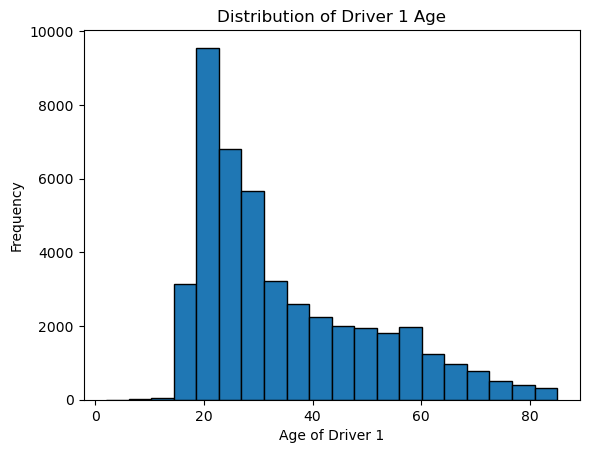

In [11]:
# Example: Histogram of Age_Drv1
plt.hist(data['Age_Drv1'], bins=20, edgecolor='black')
plt.xlabel('Age of Driver 1')
plt.ylabel('Frequency')
plt.title('Distribution of Driver 1 Age')
plt.show()

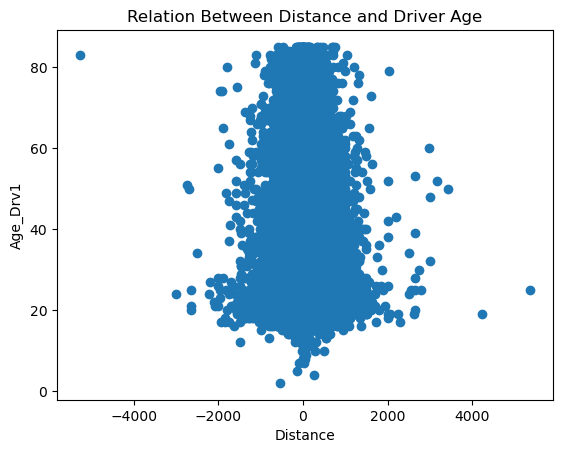

In [12]:
# Scatter Plot Between Distance And Driver Age
plt.scatter(data['Distance'],data['Age_Drv1'])
plt.xlabel('Distance')
plt.ylabel('Age_Drv1')
plt.title('Relation Between Distance and Driver Age')
plt.show()

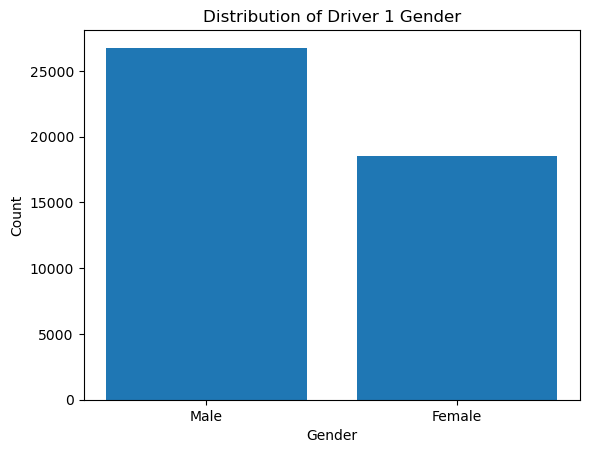

In [13]:
# Bar chart of Gender_Drv1
gender_counts = data['Gender_Drv1'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Driver 1 Gender')
plt.show()

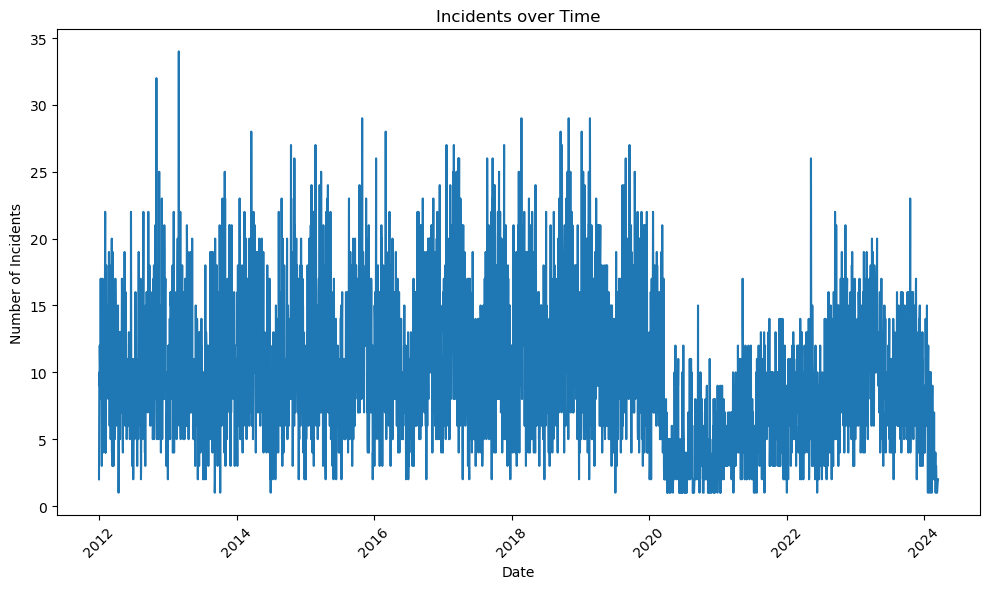

In [14]:
# Convert DateTime to datetime format 
data['DateTime'] = pd.to_datetime(data['DateTime'])

#Time series plot of incidents over time
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
data.groupby(data['DateTime'].dt.date).size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incidents over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

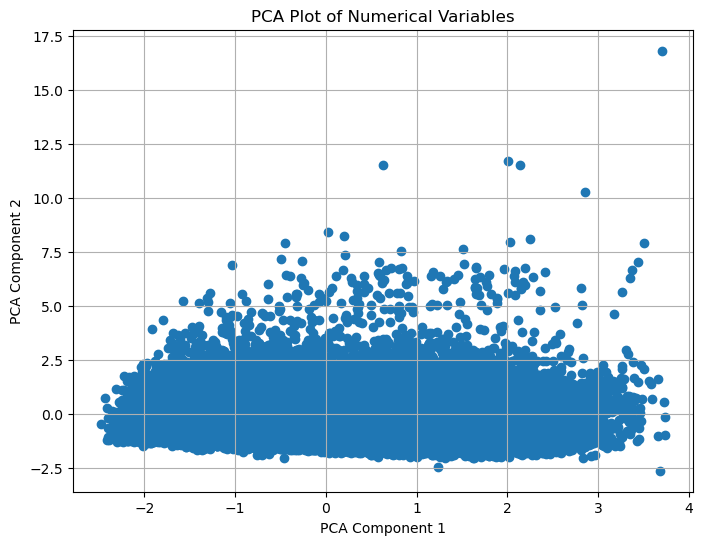

In [15]:
# Select numerical columns for PCA
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot PCA results
plt.figure(figsize=(8, 6)) 
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot of Numerical Variables')
plt.grid(True)
plt.show()

# Splitting Dataset Into Training And Test Data 

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['Totalinjuries', 'Totalfatalities', 'Incidentid', 'DateTime'], axis=1)
y = data['Totalinjuries']

# Binning 'Totalinjuries' into categories
bins = [-1, 0, 1, 5, float('inf')]  
labels = ['No injuries', 'Low injuries', 'Medium injuries', 'High injuries']

# Convert 'Totalinjuries' to categorical based on bins
y = pd.cut(y, bins=bins, labels=labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns to be encoded
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numerical and categorical data
numeric_transformer = 'passthrough'  # You can add scaling or other transformations here
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the preprocessing pipeline on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train_processed, y_train)

# Now predict using the trained model
y_pred = rf.predict(X_test_processed)

print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.90
Classification Report:
                  precision    recall  f1-score   support

  High injuries       0.00      0.00      0.00        10
   Low injuries       0.72      0.90      0.80      2102
Medium injuries       0.52      0.25      0.34       939
    No injuries       1.00      1.00      1.00      6008

       accuracy                           0.90      9059
      macro avg       0.56      0.54      0.53      9059
   weighted avg       0.88      0.90      0.88      9059



C:\Users\DELL\.jupyter\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\.jupyter\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\.jupyter\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [20]:
#Evaluate and compare the tuned model with other algorithms or ensemble methods.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb.fit(X_train_resampled, y_train_resampled)

# Now predict using the trained model
y_pred_gb = gb.predict(X_test_processed)

# Evaluate the model
print("Accuracy on test set (Gradient Boosting): {:.2f}".format(accuracy_score(y_test, y_pred_gb)))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))


Accuracy on test set (Gradient Boosting): 0.89
Classification Report (Gradient Boosting):
                  precision    recall  f1-score   support

  High injuries       0.00      0.00      0.00        10
   Low injuries       0.76      0.77      0.77      2102
Medium injuries       0.48      0.45      0.46       939
    No injuries       1.00      1.00      1.00      6008

       accuracy                           0.89      9059
      macro avg       0.56      0.56      0.56      9059
   weighted avg       0.89      0.89      0.89      9059



In [21]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')
loaded_model = joblib.load('random_forest_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test_processed)

print("Accuracy on test set (Loaded Model): {:.2f}".format(accuracy_score(y_test, y_pred_loaded)))
print("Classification Report (Loaded Model):\n", classification_report(y_test, y_pred_loaded))

Accuracy on test set (Loaded Model): 0.90
Classification Report (Loaded Model):
                  precision    recall  f1-score   support

  High injuries       0.00      0.00      0.00        10
   Low injuries       0.72      0.90      0.80      2102
Medium injuries       0.52      0.25      0.34       939
    No injuries       1.00      1.00      1.00      6008

       accuracy                           0.90      9059
      macro avg       0.56      0.54      0.53      9059
   weighted avg       0.88      0.90      0.88      9059



C:\Users\DELL\.jupyter\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\.jupyter\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\.jupyter\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
